# iris_cnn



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
# from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Conv1D, Flatten

In [0]:
!wget https://raw.githubusercontent.com/dhrim/hallym_medi_workshop_2020/master/material/iris_with_category_index.csv
  

--2020-04-17 04:10:26--  https://raw.githubusercontent.com/dhrim/hallym_medi_workshop_2020/master/material/iris_with_category_index.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2218 (2.2K) [text/plain]
Saving to: ‘iris_with_category_index.csv’

iris_with_category_ 100%[===================>]   2.17K  --.-KB/s    in 0s      

2020-04-17 04:10:26 (44.0 MB/s) - ‘iris_with_category_index.csv’ saved [2218/2218]



In [0]:
iris = pd.read_csv("iris_with_category_index.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,class
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [0]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 5)
[[6.4 2.8 5.6 2.2 2. ]
 [5.  2.3 3.3 1.  1. ]
 [4.9 2.5 4.5 1.7 2. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.7 3.8 1.7 0.3 0. ]]


In [0]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

train_x = np.reshape(train_x, (100, 4, 1))  # ADD
test_x = np.reshape(test_x, (20, 4, 1))     # ADD

print(train_x.shape)  # ADD
print(test_x.shape)   # ADD


(100, 4)
(100, 1)
(20, 4)
(20, 1)
(100, 4, 1)
(20, 4, 1)


In [0]:
model = keras.Sequential()
model.add(Conv1D(4, 3, activation='relu', input_shape=(4,1))) # ADD
model.add(Flatten())  # ADD
# model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(10, activation='relu')) # modify
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="softmax")) # 1이 아니고 클래스 수 3이다

model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 4)              16        
_________________________________________________________________
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 1.0000
loss= 0.028446242213249207
acc= 1.0


In [0]:
y_ = model.predict(test_x)
predicted_y = np.argmax(y_, axis=1)
print(y_)
print(np.argmax(y_, axis=1))


[[9.99083757e-01 9.16214194e-04 3.54143276e-18]
 [3.62755475e-03 9.96334076e-01 3.83580300e-05]
 [9.95951533e-01 4.04843502e-03 1.16207855e-14]
 [3.13876168e-04 9.99605358e-01 8.07810720e-05]
 [9.99080420e-01 9.19545302e-04 1.44313145e-18]
 [9.99706328e-01 2.93703954e-04 2.17386328e-20]
 [9.99782383e-01 2.17652734e-04 2.15885436e-21]
 [9.99732673e-01 2.67366326e-04 7.77453971e-21]
 [6.42695744e-03 9.93569732e-01 3.33254025e-06]
 [9.98116612e-01 1.88341539e-03 1.46761511e-17]
 [2.72083329e-04 1.96082026e-01 8.03645849e-01]
 [4.43916098e-04 9.99243855e-01 3.12226912e-04]
 [9.98276353e-01 1.72370335e-03 1.59049395e-17]
 [1.85286262e-04 1.31423578e-01 8.68391156e-01]
 [9.99151826e-01 8.48145806e-04 2.24873620e-18]
 [5.94400160e-04 8.33489239e-01 1.65916428e-01]
 [3.21254076e-04 9.99605715e-01 7.30783286e-05]
 [9.97834146e-01 2.16585374e-03 7.99009554e-17]
 [9.99002755e-01 9.97252646e-04 2.72534257e-18]
 [1.00304128e-03 9.98886049e-01 1.10881156e-04]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 

# AUC 그리기

100% acc에서는 ROC 스코어가 1.0이 된다. 그래서 일부러 학습을 조금만 한다.

그리고 category id 0과 기타로 이진분류에 대하여 AUC를 그린다.

In [0]:
model = keras.Sequential()
model.add(Conv1D(4, 3, activation='relu', input_shape=(4,1)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="softmax"))

model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=10, verbose=0, batch_size=20)

loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 4)              16        
_________________________________________________________________
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 1ms/step - loss: 1.0937 - accuracy: 0.3000
loss= 1.0936973094940186
acc= 0.30000

In [0]:
y_ = model.predict(test_x)
predicted_y = np.argmax(y_, axis=1)

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score

one_hot_encoded_test_y = OneHotEncoder(sparse=False).fit_transform(test_y)
print(y_.shape)
print(one_hot_encoded_test_y.shape)
print(y_[:5])
print(one_hot_encoded_test_y[:5])

score = roc_auc_score(one_hot_encoded_test_y, y_, multi_class="ovr") # ovr : one vs rest
print(score)


(20, 3)
(20, 3)
[[0.3429596  0.34550253 0.31153786]
 [0.34506524 0.32362902 0.3313057 ]
 [0.3389791  0.34771404 0.3133068 ]
 [0.35386798 0.3223889  0.32374313]
 [0.34351903 0.33786616 0.3186149 ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
0.39134939134939134


(20,)
(20,)
[0. 1. 0. 1. 0.]
[1 0 1 0 0]
[0.         0.11111111 0.11111111 1.        ]
[0.         0.         0.54545455 1.        ]


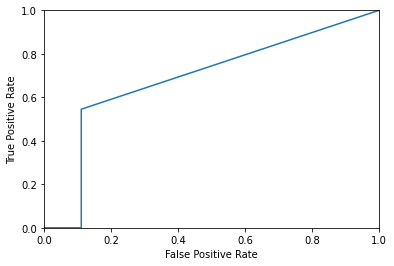

In [0]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    

true_y = test_y.squeeze()
print(true_y.shape)
print(predicted_y.shape)
print(true_y[:5])
print(predicted_y[:5])

fpr, tpr, thresholds = roc_curve(test_y.squeeze(), predicted_y, pos_label=0)

print(fpr)
print(tpr)

plot_roc_curve(fpr, tpr) 